<h1 style="font-size:28px; color:black;">Project 3 - Analyze Data With Python</h1>


<h1 style="font-size:18px; color:black;">Orel Yohanan</h1>


<div style="direction: rtl; text-align: right; unicode-bidi: plaintext; font-size:16px;">

<h3 style="margin:0 0 6px 0; text-align:right;">מטרת המחקר:</h3>
<p style="margin:0 0 14px 0; text-align:right;">
ניתוח מודל מבני תלת־מימדי וזיהוי מגמות בתכנון המבנה
</p>

<h3 style="margin:0 0 6px 0; text-align:right;">שאלות מחקר:</h3>
<ul style="margin:0; padding-right:20px;">
  <li>מהו הפיזור של אלמנטים במודל לפי סוג (קירות, עמודים, רצפות)?</li>
  <li>מהם הממדים/נפחים הממוצעים של האלמנטים, והאם יש ערכים קיצוניים?</li>
  <li>ניתוח מודל - אלמנטים קונסטרוקטיבים</li>
</ul>

<h3 style="margin:0 0 6px 0; text-align:right;">רקע:</h3>
<ul style="margin:0; padding-right:20px;">
  <li>כיום מבנים מתוכננים בתלת מימד על ידי מודל דיגיטלי - מידע על המבנה נלקח מתוכנת רוויט שבה ממודל המבנה, זהו דוגמה מעשית למבנה בשלבי תכנון שניתן לבצע בו ניתוחים שונים</li>
</ul>

</div>


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as ply
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv("‏‏revit_elements_quantities_metric_ST.csv")

In [3]:
#הבנת מבנה הנתונים - החזרת 5 שורות ראשונות
df.head()

,ElementId,UniqueId,Document,Category,Family,Type,Level,Workset,Count,Length_m,Area_m2,Volume_m3
0,2492097,bcf3edbb-9aae-4009-b90c-04a0d4cc774f-002606c1,HMP_ST_MAIN,Walls,Basic Wall,Concrete 40cm,ST-101,Concrete,1,3.750000,15.975000,6.390000
1,2492099,bcf3edbb-9aae-4009-b90c-04a0d4cc774f-002606c3,HMP_ST_MAIN,Walls,Basic Wall,Concrete 40cm,ST-101,Concrete,1,2.110000,9.495000,3.798000
2,2492100,bcf3edbb-9aae-4009-b90c-04a0d4cc774f-002606c4,HMP_ST_MAIN,Walls,Basic Wall,Concrete 40cm,ST-101,Concrete,1,3.110000,13.995000,5.598000
3,2492102,bcf3edbb-9aae-4009-b90c-04a0d4cc774f-002606c6,HMP_ST_MAIN,Walls,Basic Wall,Concrete 40cm,ST-101,Concrete,1,2.318245,8.869603,3.410841
4,2492103,bcf3edbb-9aae-4009-b90c-04a0d4cc774f-002606c7,HMP_ST_MAIN,Walls,Basic Wall,Concrete 40cm,ST-101,Concrete,1,3.896755,17.535397,7.014159


<div dir="rtl">
מקרא עבור העמודות-<br>
ElementId - מזהה ייחודי של האלמנט<br>
UniqueID - מזהה ייחודי של הקובץ<br>
Document - שם המודל - במקרה שלנו מודל קונסטרוקציה<br>
Category - קטגוריות האלמנטים<br>
Family - משפחת האלמנט<br>
Type - סוג האלמנט<br>
Level - מפלסים במבנה
Workset - סט עבודה - פנימי במודל<br>
Count - ספירה<br>
Length - אורך<br>
Area - שטח<br>
Volume - נפח<br>

In [4]:
#תקציר טכני על מבנה הטבלה
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ElementId  4443 non-null   int64  
 1   UniqueId   4443 non-null   object 
 2   Document   4443 non-null   object 
 3   Category   4443 non-null   object 
 4   Family     4443 non-null   object 
 5   Type       4443 non-null   object 
 6   Level      4443 non-null   object 
 7   Workset    4443 non-null   object 
 8   Count      4443 non-null   int64  
 9   Length_m   3918 non-null   float64
 10  Area_m2    4335 non-null   float64
 11  Volume_m3  4335 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 416.7+ KB


In [5]:
#הגדרת סוג הנתונים - קטגוריות עבור נתונים חזרתיים
cat_cols = ["Document","Category","Family","Type","Level","Workset"]

for col in cat_cols:
    df[col] = df[col].astype("category")

In [6]:
#מציאת כל הקטגוריות הקיימות
for c in df["Category"].cat.categories:
    print(c)

Doors
Floors
Structural Columns
Structural Foundations
Walls
Windows


In [7]:
df["Category"].value_counts()

Category
Walls                     3918
Structural Columns         149
Floors                     122
Windows                    108
Doors                      107
Structural Foundations      39
Name: count, dtype: int64

In [8]:
df.describe()

,ElementId,Count,Length_m,Area_m2,Volume_m3
count,4.443000e+03,4443.0,3918.000000,4335.000000,4335.000000
mean,2.657936e+06,1.0,2.600009,16.064756,6.106505
std,6.118133e+04,0.0,4.241176,69.442903,26.631629
min,2.492097e+06,1.0,0.075000,0.058500,0.014625
25%,2.639452e+06,1.0,0.750000,2.356568,0.583632
50%,2.642141e+06,1.0,1.450000,4.829400,1.490052
75%,2.673146e+06,1.0,3.175000,10.608790,3.165750
max,2.892393e+06,1.0,49.352118,1266.839882,528.303116


In [9]:
df.describe(include='category')

,Document,Category,Family,Type,Level,Workset
count,4443,4443,4443,4443,4443,4443
unique,1,6,9,53,42,1
top,HMP_ST_MAIN,Walls,Basic Wall,Concrete 25cm,ST-105,Concrete
freq,4443,3918,3918,1825,129,4443


<div dir="rtl">
ביצעתי ניתוח ראשוני לנתונים, מסקנות עד כה</BR>
* נראה כי יש פער בכמות שורות של העמודות הבאות - Length, Area,Volume</BR>

In [10]:
#נבדוק עבור הקטגוריות אילו קטגוריות חסרות את העמודות הללו
def missing_by_category(df, cols):
    results = (
        df.groupby("Category", observed=True)[cols]
          .apply(lambda g: g.isna().sum())
          .reset_index()
    )
    return results
    
# עמודות לבדיקה:
cols_to_check = ["Length_m", "Area_m2", "Volume_m3"]
missing_summary = missing_by_category(df, cols_to_check)
missing_summary

,Category,Length_m,Area_m2,Volume_m3
0,Doors,107,0,0
1,Floors,122,0,0
2,Structural Columns,149,0,0
3,Structural Foundations,39,0,0
4,Walls,0,0,0
5,Windows,108,108,108


<div dir="rtl">
כעת ניתן להבין באילו קטגוריות יש חוסרים של מידע-מידות, מכיוון שהתמקדות הינה בנפחים ובשטחים, לא נבצע תיקונים נוספים למידע. </BR>
דלתות, חלונות - חסרי נתונים של שטחים ונפחים כיוון שאינם אלמנטים נפחיים </BR>

<div dir="rtl">
    <div style="direction: rtl; text-align: right; unicode-bidi: plaintext; font-size:16px;">
ננתח את המודל הקונסטרוקטיבי ונתעלם משגיאות/התאמות שאינן קשורות בניתוח עצמו<br>
שלב 1 - ניתוח קטגוריות במודל<br>
שלב 2 - ניתוח קוב בטון קירות בכל מפלס במבנה<br>
שלב 3 - ניתוח סוגי קירות בכל מפלס<br>
שלב 4- ניתוח קוב בטון רצפות בכל מפלס במבנה<br>
שלב 5 - ניתוח סוגי רצפות ועובי בכל מפלס<br>
</div>

<div style="direction: rtl; text-align: right; unicode-bidi: plaintext; font-size:16px;">

<h3 style="margin:0 0 6px 0; text-align:right;">ניתוח התפלגות קטגוריות במבנה:</h3>
</div>


In [11]:
cat_counts = df["Category"].value_counts()

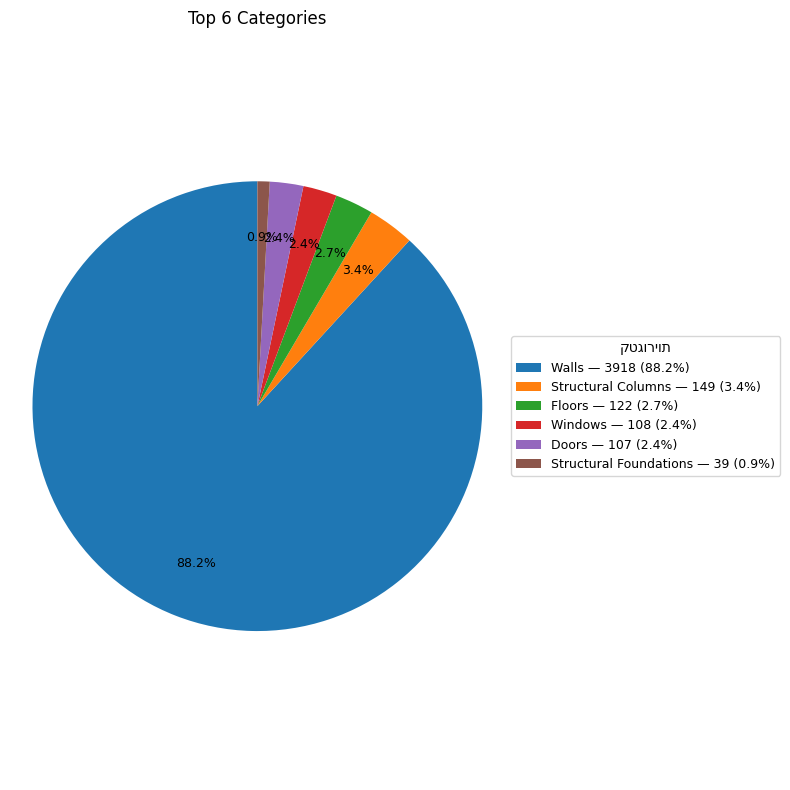

In [12]:
fig = ply.figure(figsize=(8,8))
sizes  = cat_counts.values[:6]
labels = cat_counts.index[:6]
total  = cat_counts.sum()

wedges, _, autotexts = ply.pie(
    sizes,
    labels=None,                # לא להדפיס שמות על העוגה
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.75
)
for at in autotexts: at.set_fontsize(9)

#מקרא בצד הגרף
legend_labels = [f"{lbl} — {cnt} ({cnt/total:.1%})"
                 for lbl, cnt in zip(labels, sizes)]
ply.legend(wedges, legend_labels, title="קטגוריות",
           loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

ply.title("Top 6 Categories", fontsize=12)
ply.axis("equal")
ply.tight_layout()
ply.show()


<div style="direction: rtl; text-align: right; unicode-bidi: plaintext; font-size:16px;">

<h3 style="margin:0 0 6px 0; text-align:right;">ניתוח קוב בטון קירות לפי מפלס:</h3>
</div>

In [13]:
def wall_volumes_by_level(df):
    result = (
        df[df["Category"] == "Walls"]                # מסנן רק קירות
          .groupby("Level", observed=True)["Volume_m3"]  # מקבץ לפי מפלס
          .sum()                                     # סוכם נפחים
          .reset_index()                             # הופך לטבלה רגילה
          .sort_values("Volume_m3", ascending=False) # מיון מהגדול לקטן
    )
    return result

In [14]:
wall_vols = wall_volumes_by_level(df)
print(wall_vols.head(50))

     Level    Volume_m3
40   ST-99  1709.268243
36   ST-95  1496.400686
37   ST-96   541.144809
38   ST-97   521.607986
39   ST-98   477.941213
0   ST-100   357.068985
4   ST-104   279.830228
3   ST-103   265.697328
2   ST-102   265.697328
1   ST-101   265.445447
27  ST-127   219.890006
6   ST-106   214.159547
5   ST-105   214.159547
8   ST-108   214.159547
7   ST-107   214.159547
9   ST-109   214.159547
10  ST-110   214.159547
17  ST-117   214.159547
20  ST-120   214.159547
11  ST-111   214.159547
12  ST-112   214.159547
13  ST-113   214.159547
14  ST-114   214.159547
15  ST-115   214.159547
16  ST-116   214.159547
21  ST-121   214.159547
22  ST-122   214.159547
24  ST-124   214.159547
23  ST-123   214.159547
26  ST-126   214.159547
25  ST-125   214.159547
18  ST-118   212.479154
19  ST-119   212.479154
28  ST-128   183.915391
29  ST-129   183.411570
30  ST-130   183.411459
31  ST-131   183.411459
32  ST-132   183.411459
33  ST-133   176.845615
34  ST-134   148.203496
35  ST-135   107

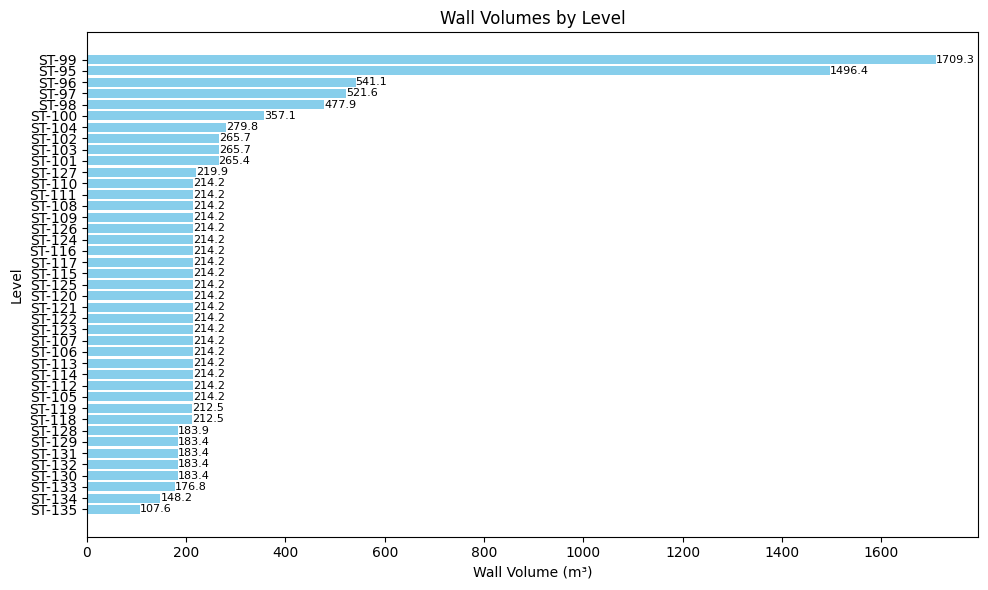

In [15]:
# חישוב נפחי קירות לפי מפלס
wall_vols = (
    df[df["Category"] == "Walls"]
      .groupby("Level", observed=True)["Volume_m3"]
      .sum()
      .reset_index()
)

# סידור לפי נפח
wall_vols = wall_vols.sort_values("Volume_m3", ascending=True)

# צירים אופקיים
ply.figure(figsize=(10, 6))
ply.barh(
    wall_vols["Level"], wall_vols["Volume_m3"],
    color="skyblue"
)

# הוספת ערכים על כל עמודה
for i, v in enumerate(wall_vols["Volume_m3"]):
    ply.text(v, i, f"{v:.1f}", va="center", fontsize=8)

ply.xlabel("Wall Volume (m³)")
ply.ylabel("Level")
ply.title("Wall Volumes by Level")
ply.tight_layout()
ply.show()


<div style="direction: rtl; text-align: right; unicode-bidi: plaintext; font-size:16px;">

<h3 style="margin:0 0 6px 0; text-align:right;">ניתוח סוגי קירות לפי מפלס:</h3>
</div>

In [16]:
def wall_types_by_level(df):
    result = (
        df[df["Category"] == "Walls"]                       # מסנן רק קירות
          .groupby("Level", observed=True)["Type"]          # מקבץ לפי מפלס
          .unique()                                         # מחזיר רשימת סוגים ייחודיים
          .reset_index(name="Wall_Types")                   # הופך לטבלה רגילה
    )
    return result

In [17]:
wall_types = wall_types_by_level(df)
print(wall_types.head(10))

    Level                                         Wall_Types
0  ST-100  ['Concrete 40cm', 'Concrete 25cm', 'Concrete 2...
1  ST-101  ['Concrete 40cm', 'Concrete 30cm', 'Concrete 2...
2  ST-102  ['Concrete 40cm', 'Concrete 30cm', 'Concrete 2...
3  ST-103  ['Concrete 40cm', 'Concrete 30cm', 'Concrete 2...
4  ST-104  ['Concrete 40cm', 'Concrete 30cm', 'Concrete 2...
5  ST-105  ['Concrete 30cm', 'Concrete 40cm', 'Concrete 2...
6  ST-106  ['Concrete 30cm', 'Concrete 40cm', 'Concrete 2...
7  ST-107  ['Concrete 30cm', 'Concrete 40cm', 'Concrete 2...
8  ST-108  ['Concrete 30cm', 'Concrete 40cm', 'Concrete 2...
9  ST-109  ['Concrete 30cm', 'Concrete 40cm', 'Concrete 2...


In [18]:
def plot_wall_types_by_level(df, top_n=10):
    # 1) סינון לקירות בלבד
    walls = df[df["Category"] == "Walls"]

    # 2) ספירה של כמה אלמנטים יש מכל סוג בכל מפלס
    counts = (
        walls.groupby(["Level", "Type"], observed=True)
             .size()
             .unstack(fill_value=0)
    )

    # 3) שמירה רק על סוגי הקירות הנפוצים ביותר
    top_types = counts.sum(axis=0).sort_values(ascending=False).head(top_n).index
    counts = counts[top_types]

    # 4) חילוץ מספר המפלס ומיון עולה
    def level_num(x):
        try:
            return int(str(x).replace("ST-", ""))
        except:
            return 10**9
    counts = counts.copy()
    counts["Level_num"] = counts.index.map(level_num)
    counts = counts.sort_values("Level_num").drop(columns="Level_num")

    # 5) גרף
    ax = counts.plot(kind="barh", stacked=True, figsize=(10, 6))

    # סידור מפלסים
    ax.invert_yaxis()

    # מקרא בצד
    ax.legend(title="Type", loc="center left", bbox_to_anchor=(1, 0.5),
              frameon=True, fontsize=9, title_fontsize=10)

    ax.set_xlabel("Count Walls Types")
    ax.set_ylabel("Level")
    ax.set_title(f"Wall Types By Levels (Top {top_n})")

    ply.tight_layout(rect=[0, 0, 0.82, 1])
    ply.show()

    return counts

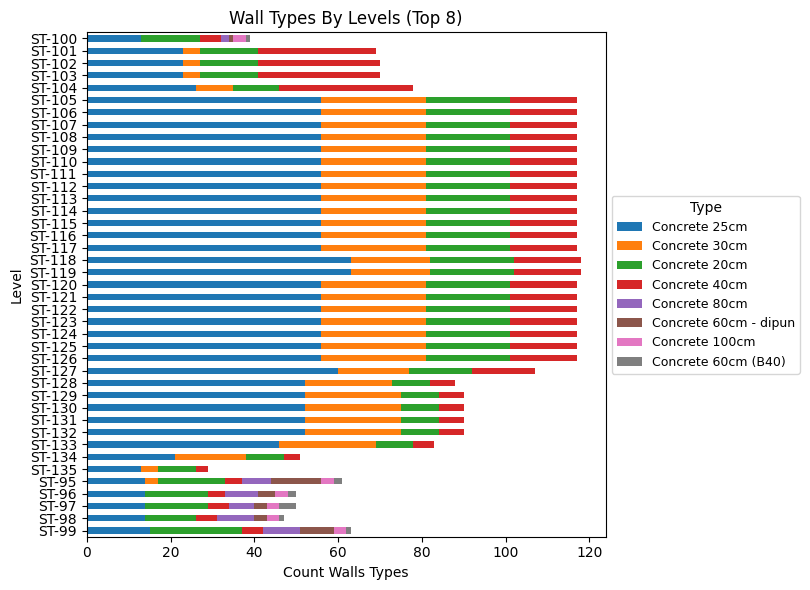

Type,Concrete 25cm,Concrete 30cm,Concrete 20cm,Concrete 40cm,Concrete 80cm,Concrete 60cm - dipun,Concrete 100cm,Concrete 60cm (B40)
Level,,,,,,,,
ST-100,13,0,14,5,2,1,3,1
ST-101,23,4,14,28,0,0,0,0
ST-102,23,4,14,29,0,0,0,0
ST-103,23,4,14,29,0,0,0,0
ST-104,26,9,11,32,0,0,0,0
ST-105,56,25,20,16,0,0,0,0
ST-106,56,25,20,16,0,0,0,0
ST-107,56,25,20,16,0,0,0,0
ST-108,56,25,20,16,0,0,0,0


In [19]:
plot_wall_types_by_level(df, top_n=8)

<div style="direction: rtl; text-align: right; unicode-bidi: plaintext; font-size:16px;">

<h3 style="margin:0 0 6px 0; text-align:right;">ניתוח קוב בטון רצפות לפי מפלס:</h3>
</div>

In [20]:
def Floors_volumes_by_level(df):
    result = (
        df[df["Category"] == "Floors"]                # מסנן רק קירות
          .groupby("Level", observed=True)["Volume_m3"]  # מקבץ לפי מפלס
          .sum()                                     # סוכם נפחים
          .reset_index()                             # הופך לטבלה רגילה
          .sort_values("Volume_m3", ascending=False) # מיון מהגדול לקטן
    )
    return result

In [21]:
Floors_vols = Floors_volumes_by_level(df)
print(Floors_vols.head(50))

     Level   Volume_m3
39   ST-98  799.576090
1   ST-101  569.645211
40   ST-99  498.564366
4   ST-104  495.188281
38   ST-97  395.966614
37   ST-96  378.020400
2   ST-102  344.976639
3   ST-103  344.976639
0   ST-100  333.461404
5   ST-105  265.657228
33  ST-133  243.742061
32  ST-132  243.466436
31  ST-131  243.466436
30  ST-130  243.260636
29  ST-129  243.260636
28  ST-128  178.607039
34  ST-134  166.637005
8   ST-108  155.401293
7   ST-107  155.401293
6   ST-106  155.401293
9   ST-109  155.401293
13  ST-113  155.401293
10  ST-110  155.401293
11  ST-111  155.401293
12  ST-112  155.401293
24  ST-124  155.401293
23  ST-123  155.401293
22  ST-122  155.401293
21  ST-121  155.401293
20  ST-120  155.401293
19  ST-119  155.401293
18  ST-118  155.401293
17  ST-117  155.401293
16  ST-116  155.401293
15  ST-115  155.401293
14  ST-114  155.401293
27  ST-127  155.401293
26  ST-126  155.401293
25  ST-125  155.401293
35  ST-135   93.263298
36  ST-136   27.539485


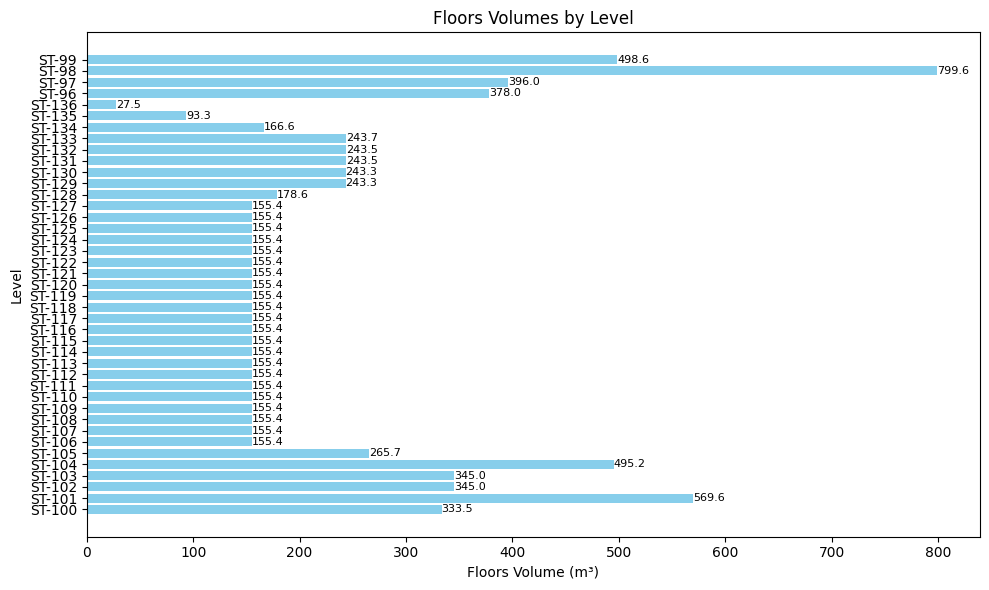

In [22]:
# חישוב נפחי רצפות לפי מפלס
Floors_vols = (
    df[df["Category"] == "Floors"]
      .groupby("Level", observed=True)["Volume_m3"]
      .sum()
      .reset_index()
)

# פונקציה לחילוץ מספר המפלס
def level_num(x):
    try:
        return int(str(x).replace("ST-", ""))
    except:
        return 10**9   # למקרים כמו SEA LEVEL

# הוספת עמודת עזר עם מספר המפלס
Floors_vols["Level_num"] = Floors_vols["Level"].map(level_num)

# מיון לפי מספר המפלס
Floors_vols = Floors_vols.sort_values("Level_num")

# ציור גרף אופקי
ply.figure(figsize=(10, 6))
ply.barh(
    Floors_vols["Level"], Floors_vols["Volume_m3"],
    color="skyblue"
)

# הוספת ערכים על כל עמודה
for i, v in enumerate(Floors_vols["Volume_m3"]):
    ply.text(v, i, f"{v:.1f}", va="center", fontsize=8)

ply.xlabel("Floors Volume (m³)")
ply.ylabel("Level")
ply.title("Floors Volumes by Level")
ply.tight_layout()
ply.show()

In [23]:
def floors_types_by_level(df):
    result = (
        df[df["Category"] == "Floors"]                       # מסנן רק רצפות
          .groupby("Level", observed=True)["Type"]          # מקבץ לפי מפלס
          .unique()                                         # מחזיר רשימת סוגים ייחודיים
          .reset_index(name="Wall_Types")                   # הופך לטבלה רגילה
    )
    return result

<div style="direction: rtl; text-align: right; unicode-bidi: plaintext; font-size:16px;">

<h3 style="margin:0 0 6px 0; text-align:right;">ניתוח סוגי רצפות לפי מפלס:</h3>
</div>

In [24]:
floors_types = floors_types_by_level(df)
print(floors_types.head(10))

    Level                                         Wall_Types
0  ST-100  ['D=40', 'D=25', 'D=30']
Categories (53, objec...
1  ST-101  ['D=25', 'D=60', 'D=40', 'D=100', 'D=30']
Cate...
2  ST-102  ['D=30', 'D=40']
Categories (53, object): ['10...
3  ST-103  ['D=30', 'D=40']
Categories (53, object): ['10...
4  ST-104  ['D=50']
Categories (53, object): ['100/100', ...
5  ST-105  ['D=30', 'D=25', 'D=50']
Categories (53, objec...
6  ST-106  ['D=22', 'D=25', 'D=20']
Categories (53, objec...
7  ST-107  ['D=22', 'D=25', 'D=20']
Categories (53, objec...
8  ST-108  ['D=22', 'D=25', 'D=20']
Categories (53, objec...
9  ST-109  ['D=22', 'D=25', 'D=20']
Categories (53, objec...


In [25]:
def plot_floors_types_by_level(df, top_n=10):
    # 1) סינון לקירות בלבד
    floors = df[df["Category"] == "Floors"]

    # 2) ספירה של כמה אלמנטים יש מכל סוג בכל מפלס
    counts = (
        floors.groupby(["Level", "Type"], observed=True)
             .size()
             .unstack(fill_value=0)
    )

    # 3) שמירה רק על סוגי רצפות הנפוצים ביותר
    top_types = counts.sum(axis=0).sort_values(ascending=False).head(top_n).index
    counts = counts[top_types]

    # 4) חילוץ מספר המפלס ומיון עולה
    def level_num(x):
        try:
            return int(str(x).replace("ST-", ""))
        except:
            return 10**9
    counts = counts.copy()
    counts["Level_num"] = counts.index.map(level_num)
    counts = counts.sort_values("Level_num").drop(columns="Level_num")

    # 5) גרף
    ax = counts.plot(kind="barh", stacked=True, figsize=(10, 6))

    # סידור מפלסים
    ax.invert_yaxis()

    # מקרא בצד
    ax.legend(title="Type", loc="center left", bbox_to_anchor=(1, 0.5),
              frameon=True, fontsize=9, title_fontsize=10)

    ax.set_xlabel("Count Walls Types")
    ax.set_ylabel("Level")
    ax.set_title(f"Wall Types By Levels (Top {top_n})")

    ply.tight_layout(rect=[0, 0, 0.82, 1])
    ply.show()

    return counts

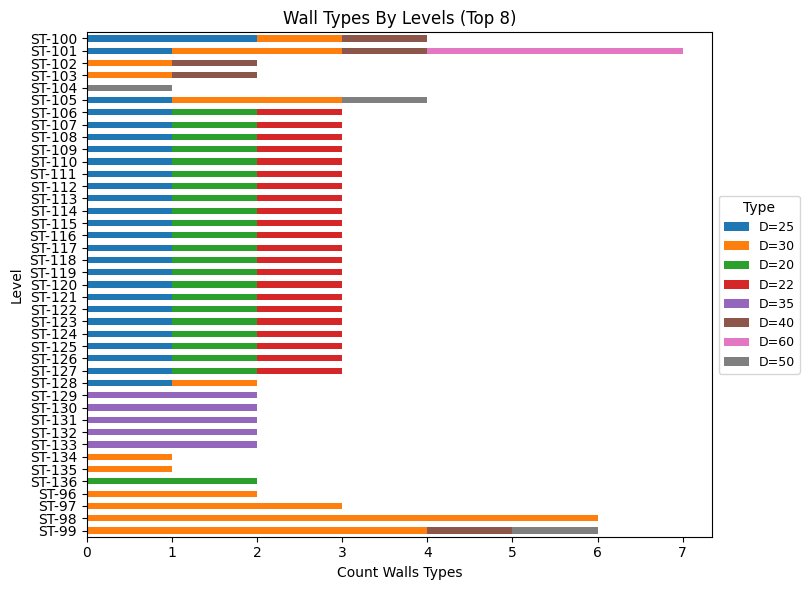

Type,D=25,D=30,D=20,D=22,D=35,D=40,D=60,D=50
Level,,,,,,,,
ST-100,2,1,0,0,0,1,0,0
ST-101,1,2,0,0,0,1,3,0
ST-102,0,1,0,0,0,1,0,0
ST-103,0,1,0,0,0,1,0,0
ST-104,0,0,0,0,0,0,0,1
ST-105,1,2,0,0,0,0,0,1
ST-106,1,0,1,1,0,0,0,0
ST-107,1,0,1,1,0,0,0,0
ST-108,1,0,1,1,0,0,0,0


In [26]:
plot_floors_types_by_level(df, top_n=8)

<div style="direction: rtl; text-align: right; unicode-bidi: plaintext; font-size:16px;">

<h3 style="margin:0 0 6px 0; text-align:right;">ניתוח קשר בין רצפות לקירות:</h3>
</div>

In [27]:
def plot_wall_floor_ratio(df):

    # נפחי קירות לפי מפלס
    walls_vols = (
        df[df["Category"] == "Walls"]
          .groupby("Level", observed=True)["Volume_m3"]
          .sum()
          .reset_index(name="Wall_Volume")
    )

    # נפחי רצפות לפי מפלס
    floors_vols = (
        df[df["Category"] == "Floors"]
          .groupby("Level", observed=True)["Volume_m3"]
          .sum()
          .reset_index(name="Floor_Volume")
    )

    # איחוד לפי מפלסים
    merge_vols = pd.merge(walls_vols, floors_vols, on="Level", how="inner")

    # חישוב יחס (נמנע מחלוקה באפס)
    merge_vols["Wall/Floor Ratio"] = merge_vols.apply(
        lambda row: row["Wall_Volume"] / row["Floor_Volume"] if row["Floor_Volume"] > 0 else None,
        axis=1
    )

    # מיון לפי יחס
    merge_vols = merge_vols.sort_values("Wall/Floor Ratio", ascending=True)

    # ציור ברים אופקיים
    ply.figure(figsize=(10, 6))
    ply.barh(merge_vols["Level"], merge_vols["Wall/Floor Ratio"], color="mediumseagreen")

    # הוספת ערכים על כל עמודה
    for i, v in enumerate(merge_vols["Wall/Floor Ratio"]):
        ply.text(v, i, f"{v:.2f}", va="center", fontsize=8)

    # עיצוב גרף
    ply.xlabel("Wall/Floor Ratio")
    ply.ylabel("Level")
    ply.title("Wall to Floor Volume Ratio by Level")
    ply.tight_layout()
    ply.show()

    return merge_vols

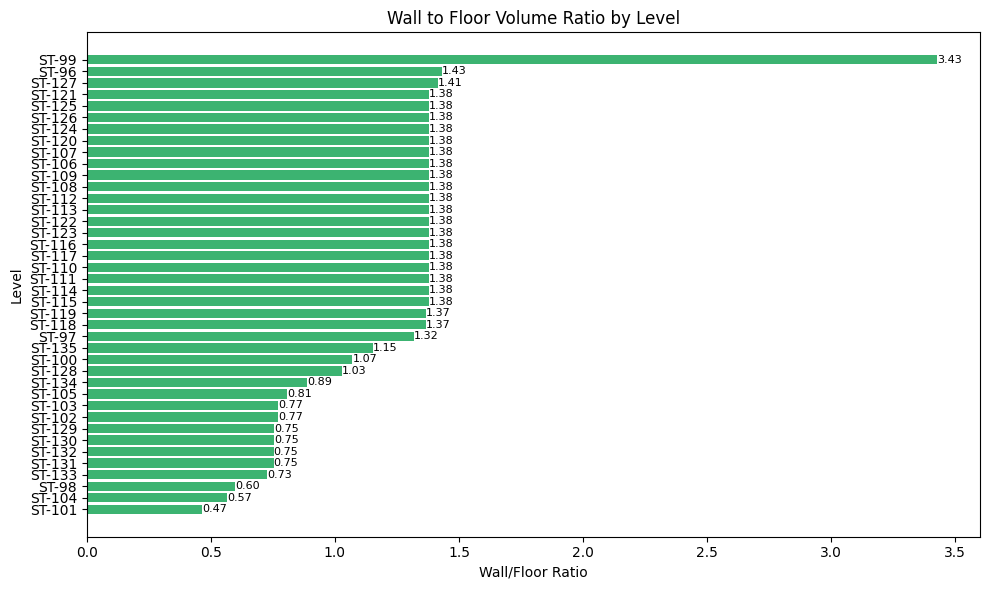

     Level  Wall_Volume  Floor_Volume  Wall/Floor Ratio
1   ST-101   265.445447    569.645211          0.465984
4   ST-104   279.830228    495.188281          0.565099
38   ST-98   477.941213    799.576090          0.597743
33  ST-133   176.845615    243.742061          0.725544
31  ST-131   183.411459    243.466436          0.753334


In [28]:
ratios = plot_wall_floor_ratio(df)
print(ratios.head())

In [29]:
def plot_wall_floor_heatmap(df, annot=False):
    # שליפת נפחים רק לקירות/רצפות
    vols = (
        df[df["Category"].isin(["Walls", "Floors"])]
          .groupby(["Level", "Category"], observed=True)["Volume_m3"]
          .sum()
          .reset_index()
    )

    # טבלת ציר: Level × Category
    pivot = vols.pivot(index="Level", columns="Category", values="Volume_m3").fillna(0)

    # סידור מפלסים לפי מספר (ST-101 -> 101)
    def level_num(x):
        try:
            return int(str(x).replace("ST-", ""))
        except:
            return 10**9  # ערכים לא מספריים בסוף
    pivot = pivot.loc[sorted(pivot.index, key=level_num)]

    # גרף
    ply.figure(figsize=(8, 10))
    sb.heatmap(
        pivot,
        annot=annot, fmt=".0f",
        cmap="YlGnBu",
        cbar_kws={"label": "Volume (m³)"}
    )
    ply.title("Heatmap: Wall & Floor Volumes by Level")
    ply.ylabel("Level")
    ply.xlabel("Category")
    ply.tight_layout()
    ply.show()

    return pivot

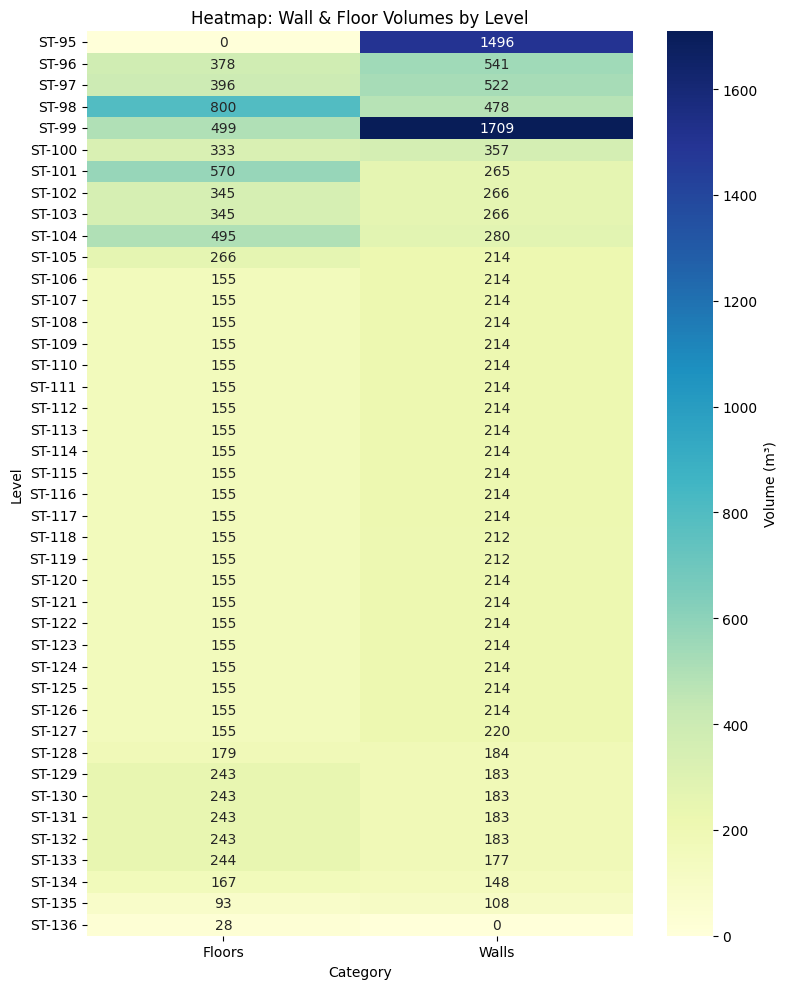

In [30]:
_ = plot_wall_floor_heatmap(df, annot=True)

<div dir="rtl">
מה המשמעות של הערכים?<br>
יחס ≈ 1 → נפח הקירות דומה לנפח הרצפות → “איזון” בין האלמנטים.<br>
יחס > 1 → נפח הקירות גדול מנפח הרצפות → מעיד על קומות עם הרבה מחיצות/קירות חוץ עבים יחסית לשטח הרצפות. לדוגמה:<br>
קומות מרתף (קירות מאסיביים-נושאי עומס, רצפות דקות יותר).<br>
קומות טכניות עם מעט רצפות אבל הרבה מחיצות.<br>
יחס < 1 → נפח הקירות קטן מנפח הרצפות → לרוב קומות “שטוחות” עם הרבה רצפה ומעט קירות (קומות חניה פתוחות, לובי פתוח וכו’).<br>
מה ניתן ללמוד מהגרף?<br>
רואים שרוב הקומות נעות סביב 1.3–1.4 → כלומר יש יחס קירות גבוה יחסית לרצפות.<br>
יש חריגים נמוכים (0.47–0.6) → מפלסים עם הרבה רצפות יחסית, מעט קירות.<br>
ויש חריג גבוה במיוחד (3.43 ב־ST-99) → ייתכן קיר תומך או מעטפת כבדה מאוד בקומה הזו.<br>
</div>

<div dir="rtl">
מסקנות:<br>
בקומות העליונות קרי קומה 36-35 כמות קוב בטון של קירות ורצפות היא הנמוכה ביותר<br>
בקומות התחתונות - מרתפים, כמות הקוב הינה הגבוה ביותר<br>
ניתן להסיק מכך שהעומס על המבנה יורד לביסוס של המבנה<br>
ניתן להבין קשר ישיר בין מפלס 99 - מינוס 1 שבו כמות הקוב בטון קירות הגבוהה ביותר וכי הרצפה מהם צומחים הקירות הינה הרצפה העבה ביותר עם הקוב הגדול ביותר שהיא רצפה של מפלס מינוס 2<br>
ניתן לזהות קומות טיפוסיות-חזרתיות ע"י קוב בטון זהה<br>
ניתן לזהות שסוגי הקירות העבים ביותר הינם במרתפים - עוזר להבנה שהעומס יורד לביסוס המבנה<br>
ככל שעולים במפלס ניתן לראות שעובי וסוג הקיר הינם קירות פחות עבים - מכיוו שהעומס הוא אנכי<br>
קומות 18,19,27 - ישנה אנומליה - ניתן לראות שינוי בסוגי הקירות ועוביים - כנראה כאלו קומות מיוחדות - נדרש לבדוק מול מתכנן המבנה<br>
</div>

<div dir="rtl">
 סיכום ניתוח הגרפים<br>
1. התפלגות קטגוריות (Pie Chart)<br>
מראה ש־88% מהאלמנטים הם קירות.<br>
יתר האלמנטים (רצפות, חלונות, דלתות) מהווים חלק קטן יחסית.<br>
 תובנה: רוב הדאטה נשען על ניתוח הקירות → לכן אמקד את האנליזה בהם.<br>
2. נפחי קירות לפי מפלס (Barh)<br>
נפחי הקירות משתנים משמעותית בין הקומות.<br>
רואים קומות עם נפח קירות חריג גבוה מאוד (לדוגמה ST-99, ST-95).<br>
 תובנה: יש קומות טכניות/מיוחדות עם ריכוז קירות גדול במיוחד שדורשות בדיקה נפרדת.<br>
3. סוגי קירות לפי מפלס (Stacked Barh)<br>
מציג את התפלגות סוגי הקירות בכל מפלס.<br>
בקומות "טיפוסיות" רואים חזרתיות על אותם סוגים, לעומת קומות חריגות שבהן יש פיזור רחב יותר.<br>
 תובנה: ניתן לזהות קומות סטנדרטיות מול קומות חריגות לפי גיוון סוגי הקירות.<br>
4. יחס קירות/רצפות (Barh)<br>
יחס סביב 1–1.4 מצביע על איזון בין שטחי קירות לרצפות.<br>
יחס נמוך מאוד (0.4–0.6) → הרבה רצפה ביחס לקירות (קומות פתוחות יותר).<br>
יחס גבוה במיוחד (3.4 בקומה ST-99) → עודף קירות לעומת רצפות.<br>
 תובנה: היחס מאפשר לזהות קומות לובי/חניה (מעט קירות) מול קומות טכניות/מעטפת (עודף קירות).<br>
5. Heatmap (Walls vs Floors Volumes)<br>
מציג בו זמנית את נפחי הקירות והרצפות בכל קומה.<br>
מאפשר לזהות "דפוס יציב" בקומות הרגילות לעומת חריגות נקודתיות.<br>
 תובנה: הקומות 35–136 מציגות יציבות גבוהה (155–214 מ״ק), בעוד קומות תחתונות וגבוהות מציגות חריגות מובהקות.<br>
 סיכום כללי
רוב האלמנטים הם קירות → מיקוד האנליזה <br>
ברוב הקומות (35–136) יש דפוס אחיד של נפחים ויחסים → מצביע על קומות טיפוסיות.<br>
קיימות קומות חריגות עם נפחים/יחסים יוצאי דופן (ST-95, ST-99, ST-101, ST-104) → דורשות ניתוח הנדסי נוסף.<br>
השוואת יחס קירות/רצפות ו־Heatmap נותנת כלי טוב לאיתור קומות בעייתיות או מיוחדות בתכנון/ביצוע.<br>
</div>